Write down system of ODEs

dSdt = -k1*S*E + kn1*C   
dEdt = -k1*C + kn1*C + k2*C - k3*E*I + kn3*CI  
dCdt = k1*S*E - kn1*C -k2*C  
dPdt = k2*C  
dIdt = kn3*CI - k3*I*E  
dCIdt= k3*I*e - kn3*CI  

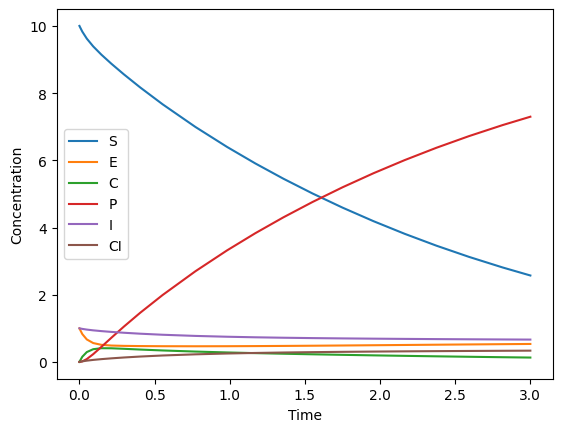

In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

#this code can be resued for basically everything

# dydt is written as a function (like ode45 in MATLAB)
def comp_enzyme_inhib(t, y, k1, kn1, k2, k3, kn3):
    #takes in the species


    #THESE CHANGE OVER TIME, DO NOT SET THEM AS CONSTANTS!
    S,E,C,P,I,CI = y # unpack y


    # differential equations
    #there's a video on how to write these down from a reaction network
    dSdt = -k1*S*E + kn1*C 
    dEdt = -k1*E*S + kn1*C + k2*C - k3*E*I + kn3*CI
    dCdt = k1*S*E - kn1*C - k2*C
    dPdt = k2*C
    dIdt = kn3*CI - k3*I*E
    dCIdt= k3*I*E - kn3*CI

    #outputs the deriviates for each of the species
    #THESE NEED TO BE PUT IN THE SAME ORDER AS THE Y
    dydt = [dSdt, dEdt, dCdt, dPdt, dIdt, dCIdt] # repack dydt

    return dydt


# the time interval of the simulation
tspan = [0,3]

# set initial conditions
#you can change the I because that's the most interesting
y0 = [10,1,0,0,1,0] # S,E,C,P,I,CI
#remember, y0 must be the same size as the dydt

# integrate the ODE
sol = solve_ivp(comp_enzyme_inhib, tspan, y0, args=(1, 1, 10, 1, 1))
#plot the results
plt.plot(sol.t,sol.y.T) #the T is the transpose to get the dimensions right for plotting
plt.legend(['S','E','C','P','I','CI'])
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.show()